# Coding assignement : Traffic flow

L'énoncé nous donne une équation pouvant décrire la vitesse des voitures sur une autoroute en fonction de la densité du trafic (nombre de voitures par unité de longueur) :

$$V=V_{max}\left(1-\frac{\rho}{\rho_{max}}\right)~~~~~~~(1)$$

où: $V~\text{est la vitesse des voitures à un endroit donné}\\
\rho~\text{est la densité du trafic à cet endroit}\\
V_{max}~\text{est la vitesse maximale que peuvent atteindre les voitures (lorsque la densité tend vers 0)}\\
\rho_{max}~\text{est la densité maximale de trafic (lorsque la vitesse tend vers 0)}$
  
On peut alors définir le flux
$$F=V\rho=V_{max}\rho\left(1-\frac{\rho}{\rho_{max}}\right)~~~~~~~(2)$$

Un flux de trafic instable pouvant être modélisé comme la convection non linéaire de la densité de voitures, nous pouvons écrire

$$\frac{\delta \rho}{\delta t}+\frac{\delta F}{\delta \rho}\frac{\delta \rho}{\delta x}=0$$

ou, avec la méthode de la chaîne: 
$$\frac{\delta \rho}{\delta t}+\frac{\delta F}{\delta x}=0$$

Cette deuxième équation fonctionne mieux numériquement pour notre situation car elle permet de conserver la densité.

Nous allons discrétiser l'équation en utilisant la méthode "forward-difference" en le temps et la "backward-difference" en l'espace.
$$\rho_i^{n+1}=\rho_i^{n}-\frac{\Delta t}{\Delta x}(F_i^{n}-F_{i-1}^{n})~~~~~~~(3)$$
où $F$ est une fonction de $\rho$. Nous ferons en sorte que celle-ci soit calculée a chaque étape par le programme

Ensuite nous entrons dans le code les valeurs constantes livrées par l'énoncé, en gardant les unités proposées que nous changerons plus tard en unités du système international.

In [13]:
V_max = 80 # (km/h) La vitesse maximale atteinte par les voitures lorsque la densité tend vers 0
L = 11 # (km) La longueur du tronçon étudié
rho_max = 250 # (voitures/km) Le nombre maximum de voitures pouvant se trouver sur une portion d'1km
nx = 51 # On divise le tronçon en 51 morceaux
dt = .001 # (s) Le pas utilisé dans la discrétisation temporelle
dx = L/(nx-1) # (km) La longueur d'un pas dans la discrétisation spatiale

Et nous importons quelques packages qui nous seront utiles plus tard

In [14]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous créons d'ores et déjà trois tableaux, respectivement pour l'espace, le flux et la vitesse des voitures. Tous ceux-ci ayant une dimension de 51, pour représenter leurs valeurs sur les 11 km par pas de $\frac{L}{nx-1}=0,22$ km

In [15]:
x = numpy.linspace(0,L,nx) # Crée un tableau de nx (= 51) éléments dont le premier est 0 et le dernier L (= 11) avec
                           # un pas régulier de L/nx-1.
F=numpy.ones(nx)
v=numpy.ones(nx)

## SIMULATION RESULTS: PART A

Tout d'abord, implentons les conditions initiales sur la densité de traffic données par l'énoncé

In [16]:
rho = numpy.ones(nx)*10 # Crée un tableau de nx (= 51) éléments qui valent tous 1*10 = 10.
rho[10:20] = 50 # Les 11ème à 20ème éléments prennent la valeur 50

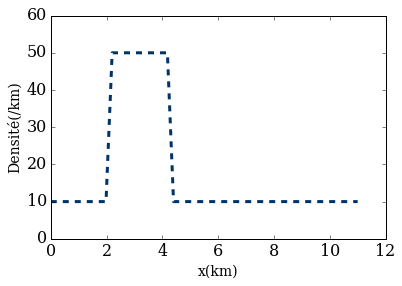

In [17]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("Densité(/km)",fontsize=14);

NB:

-Remarquons que nous avons décidé d'appeler dirrectement "rho" le tableau contenant les valeurs de $\rho(x,0)$ 


-Une des conditions a respecter est que $\rho(0,t)=10$, on se rendra vite compte que cette condition sera automatiquement respectée dès lors que nous discrétiserons l'équation différentielle présentée dans l'introduction.

### Question 1
"Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places"

Ayant les valeurs de $\rho$ partout dans l'espace discrétisé, la relation $(1)$ nous permet de directement calculer la vitesse des voitures en tout point où $\rho$ est défini, comme suit :

In [18]:
for n in range(nx):
    v[n]=V_max*(1-rho[n]/rho_max)/3.6

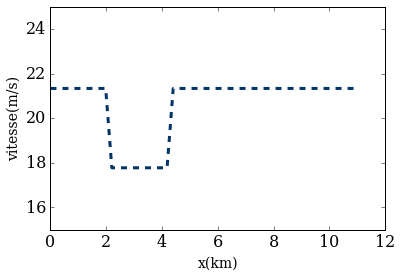

In [19]:
pyplot.plot(x, v, color='#003366', ls='--', lw=3)
pyplot.ylim(15,25);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("vitesse(m/s)",fontsize=14);

On remarque que la discontinuité des $\rho$ à bien été reproduite dans les valeurs de $V$ commme on pouvait s'y attendre. Remarquons que nous avons divisé la vitesse par 3.6 dans la boucle dans le but de l'avoir dans les unités internationales (m/s).

Maintenant nous pouvons utiliser la commande $min()$ pour extraire directement le minimum de notre tableau.

In [20]:
print("La plus petite vitesse initiale est de", min(v), "m/s.")

La plus petite vitesse initiale est de 17.7777777778 m/s.


### Question 2
"Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places"

L'algorithme se déroule ici de la manière suivante : sur base de $\rho_i^n$, nous pouvons calculer en chaque point de l'espace discrétisé la valeur de $F_i^n$, qui sera donc utilisée pour calculer $\rho_i^{n+1}$ en vertu de la relation $(3)$.

Remarquons que 3 minutes correspondent à 0,05 heures, or le pas temporel de notre discrétisation étant de 0,001 heures, il est clair que pour obtenir la valeur de la densité du traffic après 3 minutes, nous devrons répéter cet l'algorithme 50 fois.

In [21]:
F[0]=V_max*rho[0]*(1-rho[0]/rho_max) # Expliqué après.

for n in range(50):
    for i in range(1,nx): 
        F[i] = V_max*rho[i]*(1-rho[i]/rho_max) # Par (2).
        rho[i]=rho[i]-dt/dx*(F[i]-F[i-1]) # Par (3).

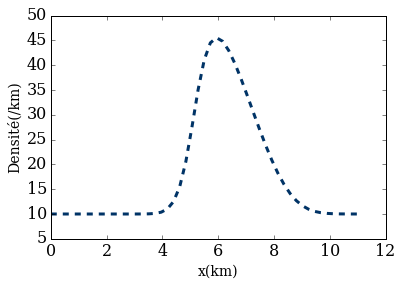

In [22]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(5,50);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("Densité(/km)",fontsize=14);

NB:
l'algorithme ci-dessus ne change pas les valeurs des tableaux pour $x=0$. En conséquence, la condition $\rho(0,t)=10$ sera maintenue et donc respectée, comme nous pouvons l'observer sur le graphique. Par contre, $F$ ayant été créé initialement comme un tableau rempli de la valeur "1", la valeur de $F_0$ sera 1 a la fin de l'algorithme, celle-ci n'ayant bien sur aucun sens ! Il est donc important d'initialiser celle-ci, la valeur $F_0^0$ étant utilisée pour calculer $\rho_1^1$, comme il a été fait a la première ligne.

La partie de code suivante calcule la vitesse en tout point de l'espace discrétisé en m/s en t = 3min. Ceci nécéssitant de recalculer F en t = 3min, et d'utiliser la relation (2) (avec toujours ce facteur 3.6, nécessaire pour avoir les vitesses dans les bonnes unités).

In [23]:
for i in range(nx): 
        v[i] = V_max*rho[i]*(1-rho[i]/rho_max)/rho[i]/3.6

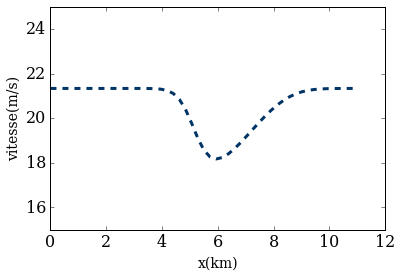

In [24]:
pyplot.plot(x, v, color='#003366', ls='--', lw=3)
pyplot.ylim(15,25);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("vitesse(m/s)",fontsize=14);

Ensuite nous créons un algorithme simple renvoyant la valeur moyenne d'un tableau, le tableau étant en l'occurrence celui des vitesses en fonction de l'espace.

In [25]:
v_moyenne=0

for n in range(nx):  
    vp=v[n]
    v_moyenne=v_moyenne+vp
    
v_moyenne=v_moyenne/51

print("La vitesse moyenne après 3 minutes vaut", v_moyenne, "m/s.")

La vitesse moyenne après 3 minutes vaut 20.6361661961 m/s.


### Question 3
"Enter the *minimum* velocity at time t = 6 minutes in meters per second. Round to 2 decimal places"


Le tableau des valeurs initiales de $\rho$ ayant changé, réinitialisons le

In [26]:
rho = numpy.ones(nx)*10 
rho[10:20] = 50 

Ensuite nous reproduisons l'algorithme de la question précédente 2 fois (en passant de 50 à 100 pas temporels pour avoir les valeurs en t = 6min). Le code de calcul de la vitesse est exactement le même. Cet algorithme nous donne donc directement un résultat :

In [27]:
F[0]=V_max*rho[0]*(1-rho[0]/rho_max) 

for n in range(100):
    for i in range(1,nx): 
        F[i] = V_max*rho[i]*(1-rho[i]/rho_max)
        rho[i]=rho[i]-dt/dx*(F[i]-F[i-1])

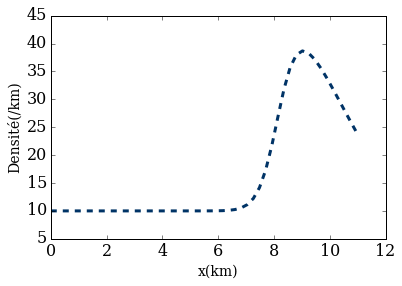

In [28]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(5,45);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("Densité(/km)",fontsize=14);

In [29]:
for i in range(nx): 
    v[i] = V_max*rho[i]*(1-rho[i]/rho_max)/rho[i]/3.6

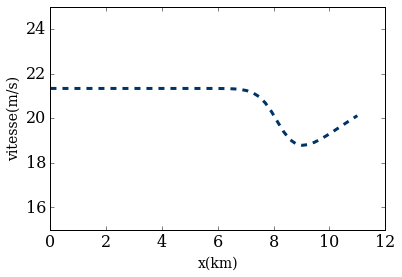

In [30]:
pyplot.plot(x, v, color='#003366', ls='--', lw=3)
pyplot.ylim(15,25);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("vitesse(m/s)",fontsize=14);

In [31]:
print("La vitesse minimale après 3 minutes vaut", min(v), "m/s.")

La vitesse minimale après 3 minutes vaut 18.7847168709 m/s.


## SIMULATION RESULTS: PART B

Nous commençons par implémenter les nouvelles conditions initiales

In [32]:
V_max = 136 # (km/h)
x = numpy.linspace(0,L,nx)
rho = numpy.ones(nx)*20 
rho[10:20] = 50

Les algorithmes de cette partie étant exactement les mêmes que ceux des questions précédentes, nous nous permettons de ne pas réexpliquer les étapes dejà explicitées précédemment.

### Question 1
"Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places"

In [33]:
for n in range(nx):
    v[n]=V_max*(1-rho[n]/rho_max)/3.6

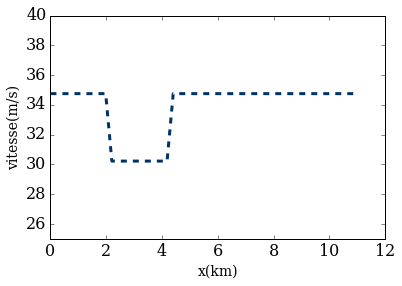

In [34]:
pyplot.plot(x, v, color='#003366', ls='--', lw=3)
pyplot.ylim(25,40);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("vitesse(m/s)",fontsize=14);

In [35]:
print("La vitesse minimale à l'instant initial vaut", min(v), "m/s.")

La vitesse minimale à l'instant initial vaut 30.2222222222 m/s.


### Question 2
"Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places"

In [36]:
F[0]=V_max*rho[0]*(1-rho[0]/rho_max)

for n in range(50):
    for i in range(1,nx): 
        F[i] = V_max*rho[i]*(1-rho[i]/rho_max)
        rho[i]=rho[i]-dt/dx*(F[i]-F[i-1])

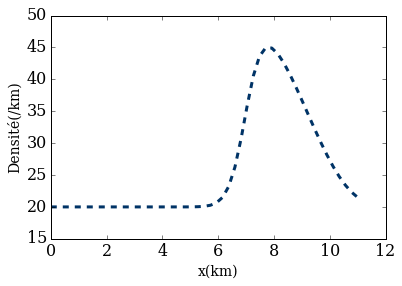

In [37]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(15,50);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("Densité(/km)",fontsize=14);

In [38]:
for i in range(nx): 
    v[i] = V_max*rho[i]*(1-rho[i]/rho_max)/rho[i]/3.6

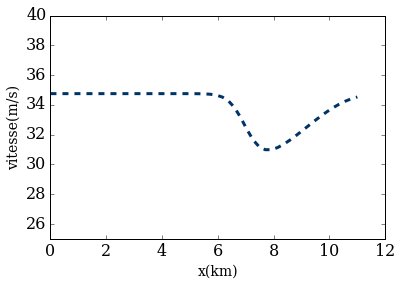

In [39]:
pyplot.plot(x, v, color='#003366', ls='--', lw=3)
pyplot.ylim(25,40);
pyplot.xlabel("x(km)",fontsize=14);
pyplot.ylabel("vitesse(m/s)",fontsize=14);

In [40]:
v_moyenne=0

for n in range(nx):  
    vp=v[n]
    v_moyenne=v_moyenne+vp
    
v_moyenne=v_moyenne/51 

print("La vitesse moyenne après 3 minutes est de ", v_moyenne, "m/s.")

La vitesse moyenne après 3 minutes est de  33.872218191 m/s.


### Question 3
"Enter the *minimum* velocity at time t = 3 minutes in meters per second. Round to 2 decimal places"

La question correspondant à la vitesse minimale en t = 3 minutes, il suffit simplement de faire un print du minimum du tabeau v de la question précédente.

In [41]:
print("La vitesse minimale après 3 minutes est de", min(v), "m/s.")

La vitesse minimale après 3 minutes est de 30.9864026806 m/s.
